In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
from trig_fund import *
from dambreak import *
from syrup_prop import *
from matplotlib import animation

Janine Birnbaum

Created: June 6, 2019

Last updated: April 13, 2021

Model Herschel-Bulkley fluid flow along inclined surface:

Flow equation:

$ h_t = \left( \frac{\rho g}{K} \right)^{1/n} \frac{\partial}{\partial x} $$ \left[ \frac{n|h_x|^{1/n-1} Y^{1+1/n}}{(n+1)(2n+1)} \left[(1+2n)h-nY \right]h_x \right] $

$ Y = h - \frac{\tau_y}{\rho g |h_x|} $

Written in dimensionless form (See Balmforth et al., 2007): 

$ h_t = \frac{\partial}{\partial x} \left[ \frac{n|h_x|^{1/n-1} Y^{1+1/n}}{(n+1)(2n+1)}[(1+2n)h-nY]h_x \right] $

$ Y = h - \frac{B}{|h_x|} $

where B = $\frac{\tau_y L}{\rho g H^2}$

$ x = L x', h = Hh', Y = HY', t = \frac L H \left( \frac{KL}{\rho g H^2} \right)^{1/n} t' $


Generalized for Herschel-Bulkley fluid on a slope following derivation from Liu & Mei (1989):

$ h_t = \frac{\partial}{\partial x} \left[ \left( \frac{\rho g}{K} \right)^{1/n} \frac{n \left| \sin{\theta} - \frac{\partial}{\partial x} \left( h \cos{\theta} \right) \right|^{1/n-1} Y^{1+1/n}}{(n+1)(2n+1)} \left[(1+2n)h-nY \right] \left( \sin{\theta} - \frac{\partial}{\partial x} \left( h \cos{\theta} \right) \right) \right] $

$ Y = h - \frac{\tau_y}{\rho g |\sin{\theta} - \frac{\partial}{\partial x} \left( h \cos{\theta} \right)|} $

For full derivation see included PDF "Viscoplastic Flow Derivation".


Dimensional Analysis for spatially and temporally varying slope, density, consistency, and yield stress (constant n): 

$h = H \hat{h}, x = L \hat{x}, \theta = \theta_0 \hat{\theta}, \rho = \rho_0 \hat{\rho}, g = g_0 \hat{g}, K = K_0 \hat{K}, h = H \hat{h}$ 

For height-dominated flow: 

$ t = \frac L H \left( \frac{K_0 L}{\rho_0 g_0 H^2} \right)^{1/n} $

Plug in and drop the hat decoration: 

$ h_t = \frac{\partial}{\partial x} \left[ \left( \frac{\rho g}{K} \right)^{1/n} \frac{n \left| \frac L H \sin{\theta} - \frac{\partial}{\partial x} \left( h \cos{\theta} \right) \right|^{1/n-1} Y^{1+1/n}}{(n+1)(2n+1)} \left[(1+2n)h-nY \right] \left( \frac L H \sin{\theta} - \frac{\partial}{\partial x} \left( h \cos{\theta} \right) \right) \right] $

$ Y = h - \frac{B \tau_y}{\rho g \left| \frac L H \sin{\theta} - \frac{\partial}{\partial x} \left( h \cos{\theta} \right) \right|} $

$ B = \frac{\tau_{y_0} L}{\rho_0 g_0 H^2} $

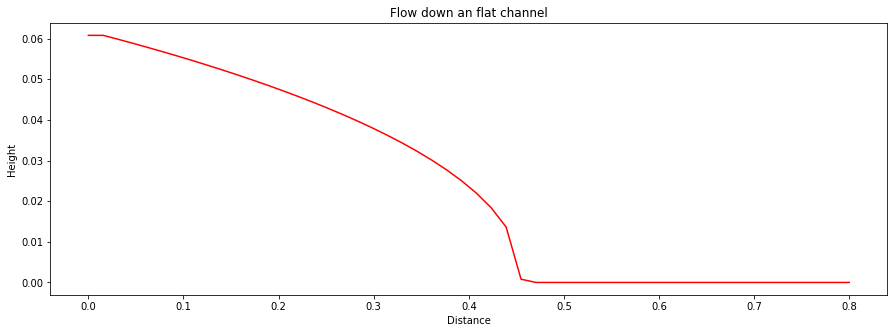

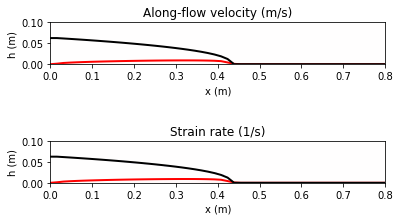

In [3]:
# Problem setup
H = 0.1 # reservoir height in m
L = 0.2  # reservoir length in m
K = 50  # consistency in Pa s
rho = 1395 # density in kg/m^3
g = 9.81   # gravitational acceleration m/s^2
tauy = 50 # yield stress in Pa
n = 1 # power law exponent
theta = 0 # slope

# Discretize domain 
m = 50
x = np.linspace(0, 0.8, m+2)
dx = x[1] - x[0]
z = np.linspace(0,H,40)
dz = z[1] - z[0]

ts = 30 # time in s
i = 100000

# Initial condition
h0 = np.zeros(m+2)
h0[x<=L] = H

# Solve
h, t, Y, u = dambreak_u(x, z, h0, 0, rho, K, tauy, n, g, ts, i) # No slope for comparison

# Strain rate
dudz = (u[:,:,1:] - u[:,:,:-1])/dz

# Plot result
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(x,h[-1,:].transpose(),'r-');
ax.set_xlabel('Distance')
ax.set_ylabel('Height')
ax.set_title('Flow down a confined channel');

fig, ax = plt.subplots(nrows=2)
a = u[0,:,:].transpose()
b = dudz[0,:,:].transpose()
im=ax[0].imshow(a,interpolation='none',cmap='bwr',extent=[0,0.8,0,H],vmax=1,vmin=-1)
line0, = ax[0].plot([], [],'r', lw=2)
line1, = ax[0].plot([], [],'k', lw=2)
ax[0].set_xlabel('x (m)')
ax[0].set_ylabel('h (m)')
ax[0].set_title('Along-flow velocity (m/s)')
#cbar = plt.colorbar(im, ax=ax[0])

im2=ax[1].imshow(a,interpolation='none',cmap='bwr',extent=[0,0.8,0,H],vmax=10,vmin=-10)
line2, = ax[1].plot([], [],'r', lw=2)
line3, = ax[1].plot([], [],'k', lw=2)
ax[1].set_xlabel('x (m)')
ax[1].set_ylabel('h (m)')
ax[1].set_title('Strain rate (1/s)')
#cbar2 = plt.colorbar(im2, ax=ax[1])

# animation function.  This is called sequentially
def animate(i):
    a=im.get_array()
    im.set_array(np.flipud(u[i*100,:,:].transpose()))
    line0.set_data(x, Y[i*100,:])
    line1.set_data(x, h[i*100])
    
    b = im2.get_array()
    im2.set_array(np.flipud(dudz[i*100,:,:].transpose()))
    line2.set_data(x, Y[i*100,:])
    line3.set_data(x, h[i*100])
    return [im]

anim = animation.FuncAnimation(fig, animate,
                               frames=500, blit=True)
    # Save
anim.save('test_velocity.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

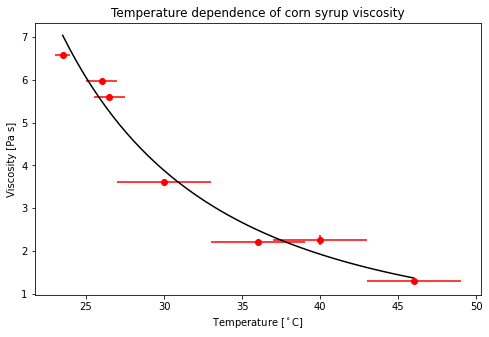

In [7]:
# Plot viscosity data and fit

T_fit = np.linspace(23.5, 46, 50)
Visc_fit = Visc(T_fit)
T_dat = [23.5, 26, 26.5, 30, 36, 40, 46]
T_err = [0.5, 1,1 , 3, 3, 3, 3]
Visc_dat = [6.588, 5.979, 5.592, 3.606, 2.204, 2.255, 1.303]
Visc_stdev = [0.032, 0.0064, 0.0064, 0.006, 0.0269, 0.112, 0.0386]

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(T_fit,Visc_fit,'k-')
ax.errorbar(T_dat, Visc_dat, xerr=T_err, yerr=Visc_stdev,
           linestyle='none', fmt='ro')
ax.set_xlabel(r'Temperature [$^\circ$C]')
ax.set_ylabel('Viscosity [Pa s]')
ax.set_title('Temperature dependence of corn syrup viscosity');

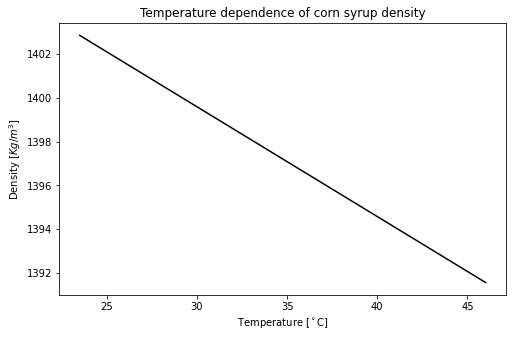

In [6]:
# Plot density data and fit
T_fit = np.linspace(23.5, 46, 50)
Density_fit = Density(T_fit)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(T_fit,Density_fit,'k-')
ax.set_xlabel(r'Temperature [$^\circ$C]')
ax.set_ylabel('Density [$Kg/m^3$]')
ax.set_title('Temperature dependence of corn syrup density');